# Titanic Dataset with Logistic Regression

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Reading the semi cleaned version of the Titanic dataset
data = pd.read_csv(r"C:\Users\prave\Desktop\V.3.0\Projects\DS Projects\Udemy\Refactored_Py_DS_ML_Bootcamp-master\13-Logistic-Regression\titanic_train.csv")

## Exploratory Data Analysis

In [6]:
# Intiating the data exploration
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Number of rows and columns
data.shape

(891, 12)

In [8]:
# Basic Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Knowing the missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

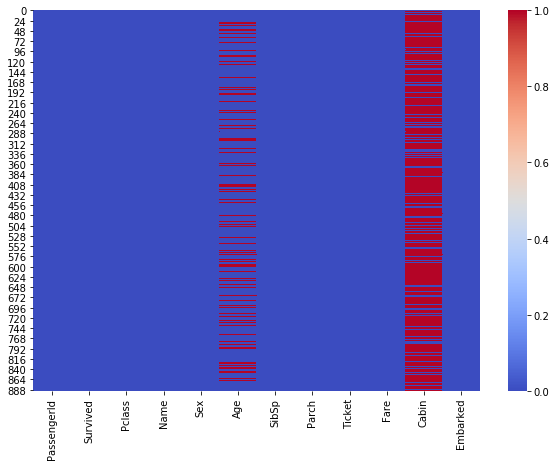

In [10]:
# Visualizing the missing values
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(),cmap="coolwarm") 

**Obervation**: Lot of missing values are in Cabin column compared to the age column.

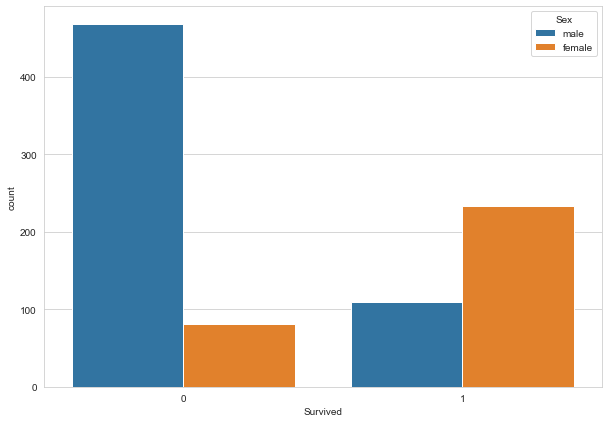

In [11]:
# Visulizing the survival count based on sex
plt.figure(figsize=(10,7))
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=data,hue="Sex")

**Obervation**: Looking at the above plot, the number of males were not likely to survive when compared to the females. But we hav to find out what was the reason for this drastic difference.

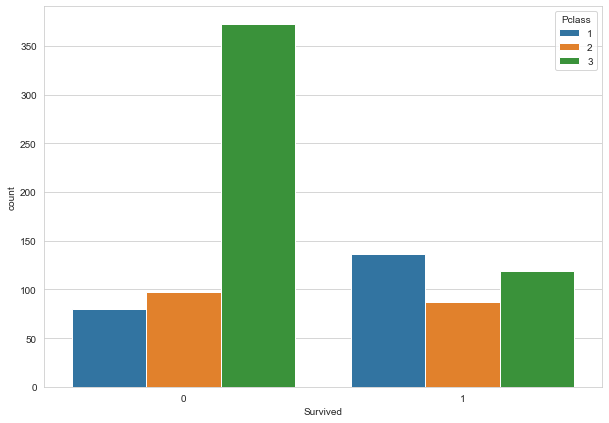

In [12]:
# Visulizing the survival count based on passenger class
plt.figure(figsize=(10,7))
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=data,hue="Pclass")

**Obervation**: Looks like more people belonging to the lower passenger class (i:e class 3) did not survive when compared to the other classes.

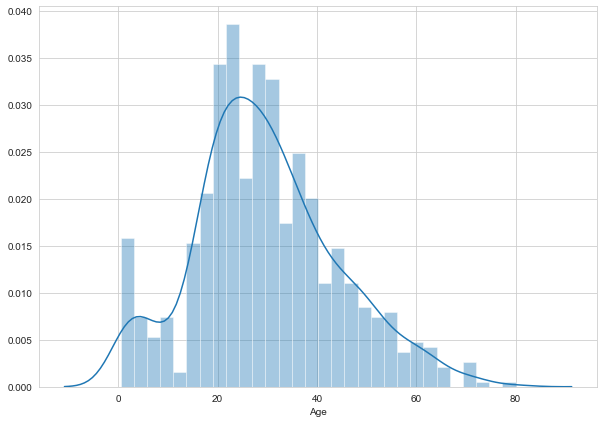

In [13]:
# Visualizing passenger's age
plt.figure(figsize=(10,7))
sns.set_style("whitegrid")
sns.distplot(data["Age"].dropna(),bins=30)

**Obervation**: The above distribution is unimodel and the average of passengers is around 25 years (pretty young passengers).

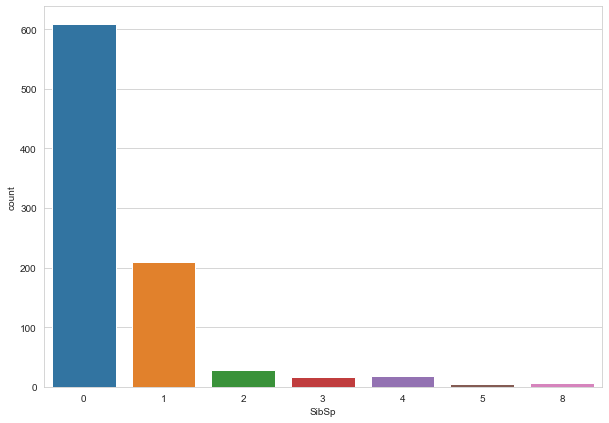

In [14]:
# Visualizing the count of passenger's children and spouse
plt.figure(figsize=(10,7))
sns.countplot(data["SibSp"])

**Obervation**: The above distribution shows that most of the passengers neither had a child or a spouse on board.

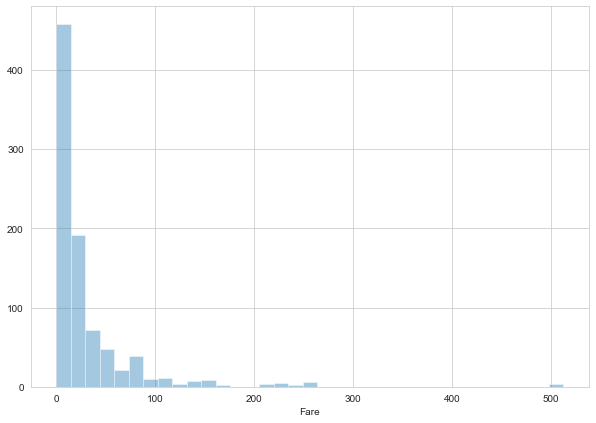

In [15]:
# Visualizing the fair of passengers
plt.figure(figsize=(10,7))
sns.distplot(data["Fare"],bins=35,kde=False)

**Obervation**: The above distribution shows that most of the passenger's tickets were ranging between 0 and 50 units, this is why most of the people were travelling in the 3rd class.

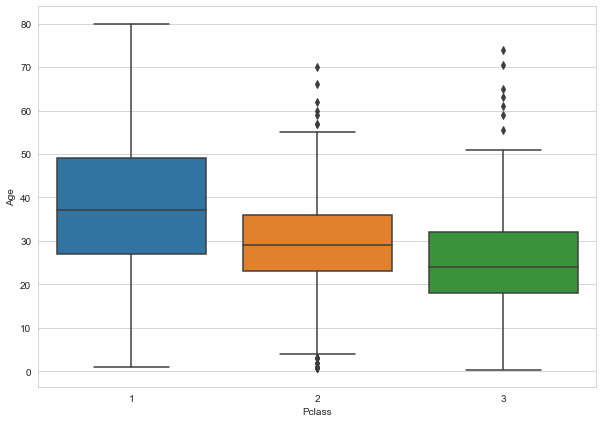

In [16]:
# Visualizing the mean age of passengers belonging to differnet classes
plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass",y="Age",data=data)

**Obervation**: From above it is seen that the passenger's age travelling in the 3rd class are younger than the other classes and they are aged around 25 years.

In [17]:
# Imputing the mean age of the passengers belonging to their respective class
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [18]:
data["Age"] = data[["Age","Pclass"]].apply(impute_age,axis=1)

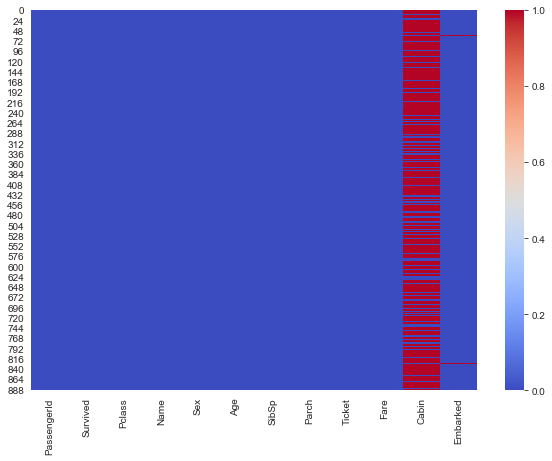

In [19]:
# Checking of the "Age" column is filled by the respective mean ages
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(),cmap="coolwarm")

In [20]:
# Since there are lot of null values in the "Cabin" column, we are dropping the column
data.drop("Cabin",axis=1,inplace=True)
# Dropping the other "NA" values in the dataset
data.dropna(inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
# Getting the dummies for "Sex" column
sex = pd.get_dummies(data["Sex"],drop_first=True)

In [22]:
# Getting the dummies for "Embarked" column
embark = pd.get_dummies(data["Embarked"],drop_first=True)

In [23]:
# Concatinaing the datasets as one
train_data = pd.concat([data,sex,embark],axis=1)

In [24]:
# Dropping the not so useful columns from the dataset
train_data.drop(labels=["Sex","Name","Ticket","Embarked","PassengerId"],axis=1,inplace=True)

In [25]:
# Checking the final train data
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Loading and cleaning the test dataset

In [26]:
# Loading Test Data that is already split
test_data = pd.read_csv(r"C:\Users\prave\Desktop\V.3.0\Projects\DS Projects\Udemy\Refactored_Py_DS_ML_Bootcamp-master\13-Logistic-Regression\titanic_test.csv")

In [27]:
# Checking
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
# Knowing the data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [29]:
# NA in data
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [30]:
# Imputing the mean age from the respective passenger classes:
def impute_age (columns):
    Age = columns[0]
    Pclass = columns[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        if Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [31]:
# Saving the age data in test dataset
test_data["Age"] = test_data[["Age","Pclass"]].apply(impute_age,axis=1)

In [38]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [40]:
# One-hot encoding for "Sex" column
test_data_sex = pd.get_dummies(test_data["Sex"],drop_first=True)

In [41]:
# One-hot encoding for "Embarked" column
test_data_embarked = pd.get_dummies(test_data["Embarked"],drop_first=True)

In [42]:
# Concatinating the Sex, Embarked and test_data as one
test_data = pd.concat([test_data,test_data_sex,test_data_embarked],axis=1)
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,NaN,S,1,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,0,1
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,NaN,S,1,0,1


In [45]:
# Dropping the not so useful columns from the dataset
test_data.drop(labels=["Sex","Name","Ticket","Embarked","PassengerId","Cabin"],axis=1,inplace=True)

In [52]:
# Filling the one missing value with the average of the "Fare" column
test_data["Fare"].fillna(value=35,inplace=True)

In [56]:
# Checking the final test_data
test_data.head(5)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [89]:
# Importing the required ML model for training the data and also for prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [91]:
train_data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [92]:
# Creating instances for X and y so that it can be used in during the model training and prediction
X = train_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q','S']]
y = train_data["Survived"]

In [101]:
# Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [102]:
# Creating a model
logistic_model = LogisticRegression()

In [103]:
# Training the model on dataset
logistic_model.fit(X_train,y_train)

C:\Users\prave\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
# Predicting the survival of passengers
prediction = logistic_model.predict(X_test)

In [105]:
# Importing confusion matrix a metric to evaluate the prediction performance
from sklearn.metrics import confusion_matrix

In [109]:
# Using confusion matrix for evaluation
pd.DataFrame(confusion_matrix(y_test,prediction),columns=["Predicted No","Predicted Yes"],index=["Actual No","Actual Yes"])

,Predicted No,Predicted Yes
Actual No,156,28
Actual Yes,26,84


**Observation**: From the confusion matrix, we can see that the false positive and false negative values are lower, so this model is acceptable for deployment.